In [35]:
import numpy as np # Import numpy lib
from numpy import convolve # 
import matplotlib.pyplot as plt

In [36]:
plt.style.use('ggplot')

In [37]:
def moving_average(y, period):
    buffer = []
    for i in range(period, len(y)):
        buffer.append(y[i - period : i].mean())
    return buffer

In [38]:
def auto_regressive(y, p, d, q, future_count):
    """
    p = the order (number of time lags)
    d = degree of differencing
    q = the order of the moving-average
    """
    buffer = np.copy(y).tolist()
    for i in range(future_count):
        ma = moving_average(np.array(buffer[-p:]), q)
        forecast = buffer[-1]
        for n in range(0, len(ma), d):
            forecast -= buffer[-1 - n] - ma[n]
        buffer.append(forecast)
    return buffer

In [39]:
y=[60, 2, 0, 0, 1, 1, 0, -1, -2, 0, -2, 6, 0, 2, 0, 4, 0, 1, 3, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 3, -1, 0, 2, 2, 1, 3, 2, 4, 2, 3, 0, 0, 2, 2, 0, 3, 1, 0, 2]
x=[1549984749, 1549984751, 1549984755, 1549984761, 1549984768, 1549984769, 1549984770, 1549984774, 1549984780, 1549984783, 1549984786, 1549984787, 1549984788,
   1549984794, 1549984797, 1549984855, 1549984923, 1549984930, 1549984955, 1549985006, 1549985008, 1549985027, 1549985086, 1549985091, 1549985101, 1549985115,
   1549985116, 1549985118, 1549985130, 1549985130, 1549985139, 1549985141, 1549985146, 1549985154, 1549985178, 1549985192, 1549985203, 1549985217, 1549985245,
   1549985288, 1549985311, 1549985316, 1549985425, 1549985447, 1549985460, 1549985463, 1549985489, 1549985561, 1549985595, 1549985610]

In [40]:
x=np.array(x)
print(np.size(x))
y=np.array(y)
print(np.size(y))

50
50


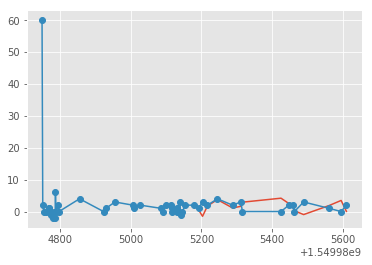

In [34]:
future_count = 15
predicted_15 = auto_regressive(y,20,1,2,future_count)

# Wrong ...
#plt.plot(x[len(x) - len(predicted_15):], predicted_15)

# Right ...
plt.plot(x[len(x) - len(predicted_15):], predicted_15[len(x):])


plt.plot(x, y, 'o-')
plt.show()